In [21]:
%load_ext autoreload
%autoreload 2

import os
import sys
import yaml

import matplotlib.pyplot as plt

PROJECT_DIR = os.path.dirname(os.getcwd())
sys.path.append(PROJECT_DIR)

from train_utils import make_compiled_supervised_model
from timbre_transfer import transfer_timbre_from_path, load_model_from_config
from utilities import load_track

def print_plot_play(x, Fs=16000, text='', normalize=False):
    import IPython.display as ipd
    print('%s\n' % (text))
    print('Fs = %d, x.shape = %s, x.dtype = %s' % (Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs, normalize=normalize))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
/files/Supervised_Violin

In [17]:
with open('../wandb/run-20210819_225938-g346rfcd/files/Supervised_Violin/config.yaml') as file:
    config = dict(yaml.load(file, Loader=yaml.FullLoader))

In [18]:
model = make_compiled_supervised_model(config)

In [19]:
resynth = transfer_timbre_from_path(model, path="../audio_clips/singing.mp3", pitch_shift=24)

/kuacc/users/hbalim15/.local/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/kuacc/users/hbalim15/.local/lib/python3.7/site-packages/crepe/core.py:209: RuntimeWarning: divide by zero encountered in true_divide
  frames /= np.std(frames, axis=1)[:, np.newaxis]
/kuacc/users/hbalim15/.local/lib/python3.7/site-packages/librosa/core/convert.py:1354: RuntimeWarning: divide by zero encountered in log10
  - 0.5 * np.log10(f_sq + const[3])
/kuacc/users/hbalim15/.local/lib/python3.7/site-packages/librosa/core/convert.py:1354: RuntimeWarning: divide by zero encountered in log10
  - 0.5 * np.log10(f_sq + const[3])
/kuacc/users/hbalim15/.local/lib/python3.7/site-packages/librosa/core/convert.py:1354: RuntimeWarning: divide by zero encountered in log10
  - 0.5 * np.log10(f_sq + const[3])
/kuacc/users/hbalim15/.local/lib/python3.7/site-packages/librosa/core/convert.py:13



Fs = 16000, x.shape = (320000,), x.dtype = float32


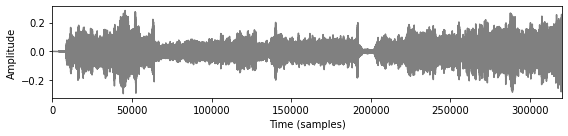

In [20]:
print_plot_play(resynth) # , normalize=True

In [25]:
track = load_track("../audio_clips/singing.mp3", normalize=True)

/kuacc/users/hbalim15/.local/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")




Fs = 16000, x.shape = (376582,), x.dtype = float32


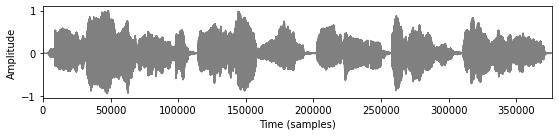

In [26]:
print_plot_play(track)